In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Hàm tạo dataset của chị Tuyết 

"Tại đây"



=== Dataset: palmer_penguins ===


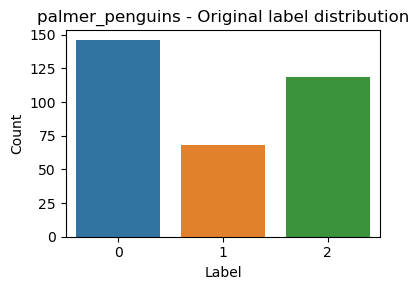

Split 40% train - 60% test: Train shape: (133, 8), Test shape: (200, 8), Train label dist: {0: 0.43609022556390975, 2: 0.3609022556390977, 1: 0.20300751879699247}, Test label dist: {0: 0.44, 2: 0.355, 1: 0.205}


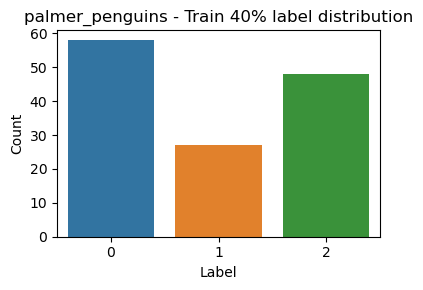

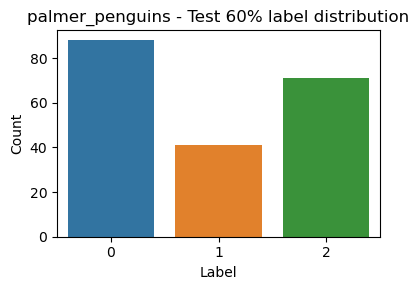

Split 60% train - 40% test: Train shape: (199, 8), Test shape: (134, 8), Train label dist: {0: 0.4371859296482412, 2: 0.35678391959798994, 1: 0.20603015075376885}, Test label dist: {0: 0.44029850746268656, 2: 0.3582089552238806, 1: 0.20149253731343283}


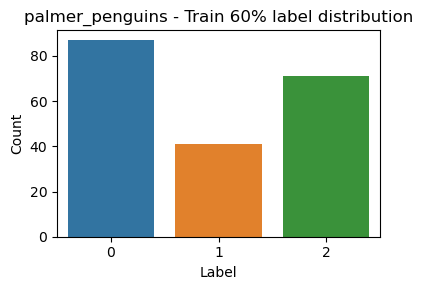

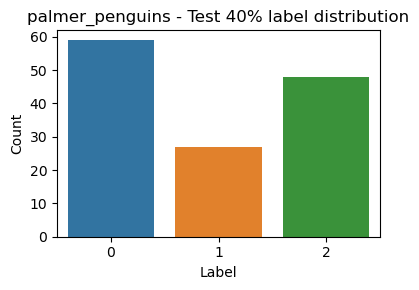

Split 80% train - 20% test: Train shape: (266, 8), Test shape: (67, 8), Train label dist: {0: 0.4398496240601504, 2: 0.35714285714285715, 1: 0.20300751879699247}, Test label dist: {0: 0.43283582089552236, 2: 0.3582089552238806, 1: 0.208955223880597}


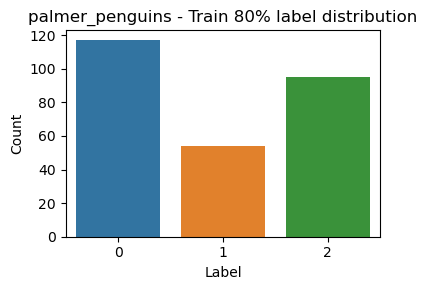

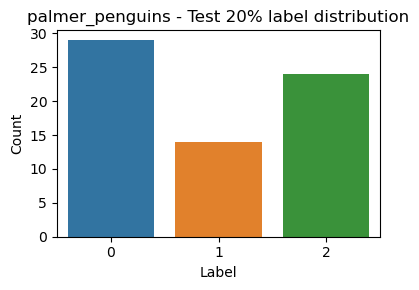

Split 90% train - 10% test: Train shape: (299, 8), Test shape: (34, 8), Train label dist: {0: 0.43812709030100333, 2: 0.35785953177257523, 1: 0.2040133779264214}, Test label dist: {0: 0.4411764705882353, 2: 0.35294117647058826, 1: 0.20588235294117646}


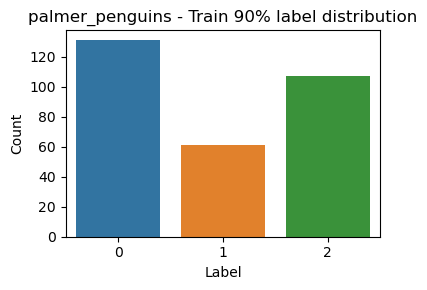

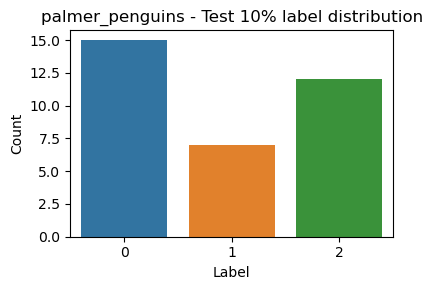


=== Dataset: heart_disease ===


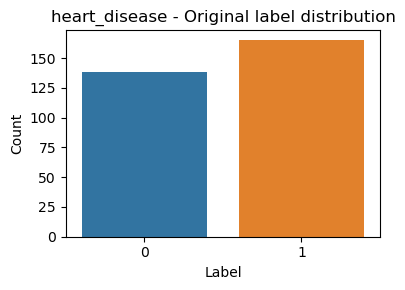

Split 40% train - 60% test: Train shape: (121, 13), Test shape: (182, 13), Train label dist: {1: 0.5454545454545454, 0: 0.45454545454545453}, Test label dist: {1: 0.5439560439560439, 0: 0.45604395604395603}


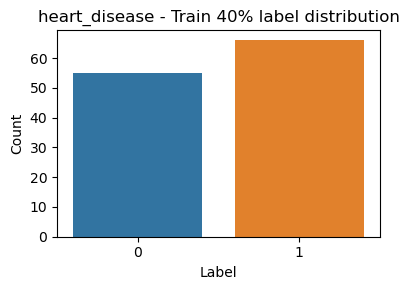

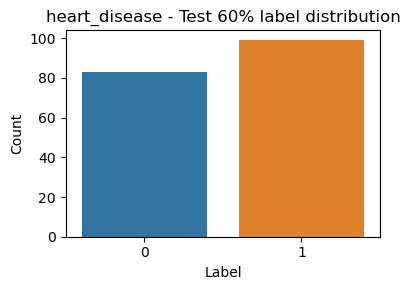

Split 60% train - 40% test: Train shape: (181, 13), Test shape: (122, 13), Train label dist: {1: 0.5469613259668509, 0: 0.4530386740331492}, Test label dist: {1: 0.5409836065573771, 0: 0.45901639344262296}


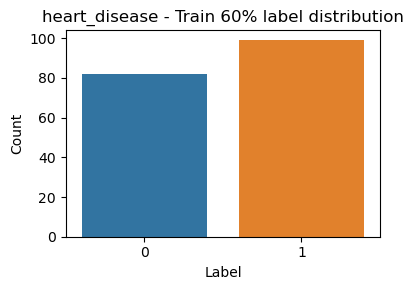

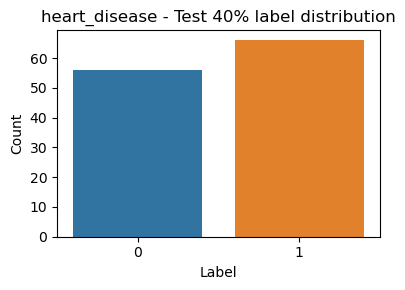

Split 80% train - 20% test: Train shape: (242, 13), Test shape: (61, 13), Train label dist: {1: 0.5454545454545454, 0: 0.45454545454545453}, Test label dist: {1: 0.5409836065573771, 0: 0.45901639344262296}


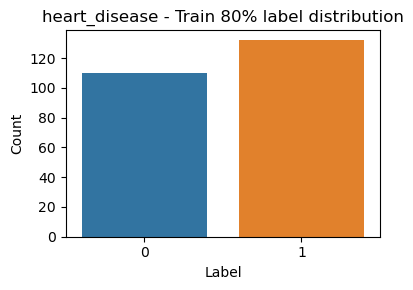

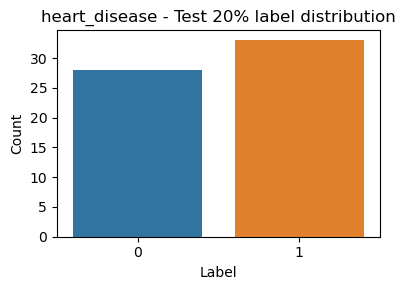

Split 90% train - 10% test: Train shape: (272, 13), Test shape: (31, 13), Train label dist: {1: 0.5441176470588235, 0: 0.45588235294117646}, Test label dist: {1: 0.5483870967741935, 0: 0.45161290322580644}


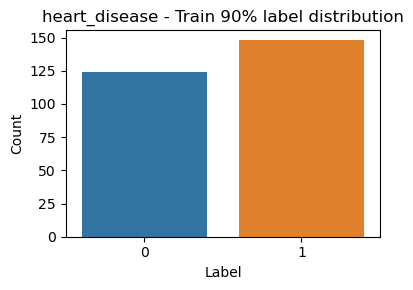

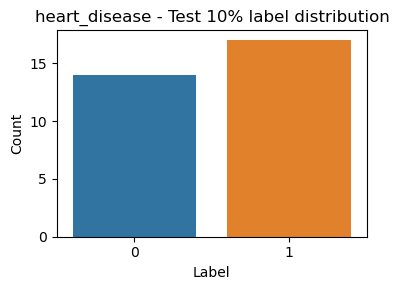

In [5]:
def preprocess(
    filepath, 
    missing_strategy='drop',  # 'drop', 'mean', 'median'
    categorical_strategy='label'  # 'label' or 'onehot'
):
    df = pd.read_csv(filepath)

    # Xử lý giá trị thiếu
    if missing_strategy == 'drop':
        df = df.dropna()
    elif missing_strategy == 'mean':
        for col in df.select_dtypes(include=['float', 'int']).columns:
            df[col] = df[col].fillna(df[col].mean())
        df = df.dropna()
    elif missing_strategy == 'median':
        for col in df.select_dtypes(include=['float', 'int']).columns:
            df[col] = df[col].fillna(df[col].median())
        df = df.dropna()

    # Xử lý categorical
    cat_cols = df.select_dtypes(include=['object']).columns
    if categorical_strategy == 'label':
        for col in cat_cols:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    elif categorical_strategy == 'onehot':
        df = pd.get_dummies(df, columns=cat_cols)

    return df

def split_features_labels(df, label_col):
    """
    Tách đặc trưng (X) và nhãn (y) từ DataFrame.
    """
    X = df.drop(columns=[label_col])
    y = df[label_col]
    return X, y

def plot_label_distribution(y, title):
    """
    Vẽ biểu đồ phân phối lớp cho nhãn y với tiêu đề title.
    """
    plt.figure(figsize=(4,3))
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

def get_dataset_path(filename):
    base_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
    dataset_dir = os.path.abspath(os.path.join(base_dir, "..", "datasets"))
    return os.path.join(dataset_dir, filename)

if __name__ == "__main__":
    datasets = {
        "palmer_penguins": {
            "path": get_dataset_path("palmer_penguins.csv"),
            "label": "species"
        },
        "heart_disease": {
            "path": get_dataset_path("heart_disease.csv"),
            "label": "target"
        },
    }
    split_ratios = [
        (0.4, 0.6),
        (0.6, 0.4),
        (0.8, 0.2),
        (0.9, 0.1)
    ]
    results = {}

    for ds_name, ds_info in datasets.items():
        print(f"\n=== Dataset: {ds_name} ===")
        df = preprocess(ds_info["path"], missing_strategy='mean', categorical_strategy='label')
        X, y = split_features_labels(df, ds_info["label"])

        # Vẽ phân phối lớp của tập gốc
        plot_label_distribution(y, f"{ds_name} - Original label distribution")

        for train_ratio, test_ratio in split_ratios:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                train_size=train_ratio, 
                test_size=test_ratio, 
                stratify=y, 
                random_state=42
            )
            train_pct = int(train_ratio * 100)
            test_pct = int(test_ratio * 100)
            # Tạo biến toàn cục cho từng tập
            globals()[f"feature_train_{train_pct}"] = X_train
            globals()[f"label_train_{train_pct}"] = y_train
            globals()[f"feature_test_{test_pct}"] = X_test
            globals()[f"label_test_{test_pct}"] = y_test

            key = f"{ds_name}_{train_pct}_{test_pct}"
            results[key] = {
                "X_train": X_train,
                "X_test": X_test,
                "y_train": y_train,
                "y_test": y_test
            }
            print(f"Split {train_pct}% train - {test_pct}% test: "
                  f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, "
                  f"Train label dist: {y_train.value_counts(normalize=True).to_dict()}, "
                  f"Test label dist: {y_test.value_counts(normalize=True).to_dict()}")

            # Vẽ phân phối lớp cho tập train
            plot_label_distribution(y_train, f"{ds_name} - Train {train_pct}% label distribution")

            # Vẽ phân phối lớp cho tập test
            plot_label_distribution(y_test, f"{ds_name} - Test {test_pct}% label distribution")


Bài của Thiện

1. Huấn luyện với từng tỷ lệ chia: 40/60, 60/40, 80/20, 90/10

In [9]:
import os
from sklearn.tree import DecisionTreeClassifier
import pickle

def train_and_save_decision_trees(data_splits, proportions, seed=42):
    """
    Train decision tree models for various data splits and save them to disk.

    Parameters:
        data_splits (list): List of tuples with (X_train, X_test, y_train, y_test).
        proportions (list): List of tuples with (train_ratio, test_ratio).
        seed (int, optional): Seed for reproducibility. Defaults to 42.

    Returns:
        list: Collection of trained decision tree models.
    """
    # Create directory for saving models if it doesn't exist
    save_dir = "decision_trees"
    os.makedirs(save_dir, exist_ok=True)

    # Initialize list to store trained models
    trained_trees = []

    # Process each data split and proportion
    for idx, (data, ratio) in enumerate(zip(data_splits, proportions)):
        train_features, _, train_labels, _ = data
        train_ratio, test_ratio = ratio

        # Configure and train decision tree
        tree = DecisionTreeClassifier(
            criterion="entropy",
            splitter="best",
            random_state=seed
        )
        tree.fit(train_features, train_labels)

        # Store trained model
        trained_trees.append(tree)

        # Generate filename based on split ratios
        file_path = os.path.join(save_dir, f"dt_model_{int(train_ratio*100)}_{int(test_ratio*100)}.pkl")

        # Save model to disk
        with open(file_path, 'wb') as f:
            pickle.dump(tree, f)

        # Print confirmation
        print(f"Model for {int(train_ratio*100)}:{int(test_ratio*100)} split trained and saved to {file_path}")

    return trained_trees

2. Hình dung cây quyết định với các tỷ lệ phân chia khác nhau

In [8]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display
import os

def plot_decision_trees(models, depths, feature_labels, class_labels):
    """
    Generate visualizations for decision tree models and save them as PNG files.

    Parameters:
        models (list): List of trained DecisionTreeClassifier instances.
        depths (list): List of integers specifying max depths for each model.
        feature_labels (list): Names of features used in the models.
        class_labels (list): Names of target classes in the dataset.
    """
    # Define output directory
    output_dir = "trees_visualization"
    os.makedirs(output_dir, exist_ok=True)

    # Process each model and depth
    for idx, (tree_model, depth) in enumerate(zip(models, depths)):
        # Generate dot format for the tree
        tree_dot = export_graphviz(
            tree_model,
            feature_names=feature_labels,
            class_names=class_labels,
            filled=True,
            rounded=True,
            special_characters=True
        )

        # Create Graphviz object
        tree_graph = graphviz.Source(tree_dot, format="png")
        tree_graph.engine = "dot"

        # Define file path for saving
        file_name = f"{output_dir}/tree_split_80_20_depth_{depth}.png"
        
        # Save the visualization
        tree_graph.render(filename=file_name, cleanup=True)

        # Display in interactive environment
        display(tree_graph)

        # Print status message
        print(f"Tree with depth {depth} for 80:20 split visualized and saved as {file_name}")

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def assess_decision_trees(models, data_splits, ratios):
    """
    Assess trained decision tree models by generating classification reports and confusion matrix heatmaps.

    Parameters:
        models (list): List of trained decision tree models.
        data_splits (list): List of tuples containing (X_train, X_test, y_train, y_test).
        ratios (list): List of tuples with (train_ratio, test_ratio).

    Returns:
        None: Saves classification reports and confusion matrix heatmaps as PNG files.
    """
    # Create output directory
    output_dir = "evaluation_reports"
    os.makedirs(output_dir, exist_ok=True)

    # Process each model, dataset, and ratio
    for idx, (model, data, (train_ratio, test_ratio)) in enumerate(zip(models, data_splits, ratios)):
        _, test_features, _, test_labels = data

        # Generate predictions
        predictions = model.predict(test_features)

        # Compute classification report as a dictionary
        report_dict = classification_report(test_labels, predictions, zero_division=1, digits=4, output_dict=True)

        # Compute confusion matrix
        cm = confusion_matrix(test_labels, predictions)

        # Create figure with two subplots
        fig = plt.figure(figsize=(14, 7))

        # Subplot 1: Classification report as a single table
        ax1 = fig.add_subplot(121)
        table_data = []
        table_rows = []

        # Extract class metrics
        for label in report_dict:
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                table_data.append([
                    report_dict[label]['precision'],
                    report_dict[label]['recall'],
                    report_dict[label]['f1-score'],
                    report_dict[label]['support']
                ])
                table_rows.append(label)
        
        # Add accuracy, macro avg, weighted avg
        table_data.append([None, None, report_dict['accuracy'], None])
        table_rows.append('accuracy')
        for avg in ['macro avg', 'weighted avg']:
            table_data.append([
                report_dict[avg]['precision'],
                report_dict[avg]['recall'],
                report_dict[avg]['f1-score'],
                report_dict[avg]['support']
            ])
            table_rows.append(avg)

        # Create table
        table = ax1.table(
            cellText=[[f"{x:.4f}" if isinstance(x, float) else x or "" for x in row] for row in table_data],
            colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
            rowLabels=table_rows,
            loc='center',
            cellLoc='center',
            colWidths=[0.2, 0.2, 0.2, 0.2],
            bbox=[0.1, 0.1, 0.8, 0.8]
        )
        table.set_fontsize(10)
        for (i, j), cell in table.get_celld().items():
            cell.set_height(0.08)
            cell.set_text_props(ha='center', va='center')
        ax1.axis('off')
        ax1.set_title('Classification Metrics')

        # Subplot 2: Confusion matrix heatmap
        ax2 = fig.add_subplot(122)
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='viridis',
            cbar=True,
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            square=True
        )
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')
        ax2.set_title('Confusion Matrix')

        # Set figure title
        fig.suptitle(f'Evaluation for {int(train_ratio*100)}:{int(test_ratio*100)} Split', fontsize=14)

        # Save figure
        file_path = os.path.join(output_dir, f'eval_report_{int(train_ratio*100)}_{int(test_ratio*100)}.png')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(file_path)
        plt.show()

        # Print confirmation
        print(f"Evaluation for {int(train_ratio*100)}:{int(test_ratio*100)} split saved to {file_path}")

In [11]:
import os
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_depth_varied_trees(data_split, depth_values):
    """
    Train decision tree models with varying max depths and compute their test accuracies.

    Parameters:
        data_split (tuple): Tuple containing (X_train, X_test, y_train, y_test).
        depth_values (list): List of max depth values (integers or None) for training models.

    Returns:
        tuple: (list of trained models, dictionary mapping max depths to test accuracies)
    """
    # Create directory for saving models
    save_dir = "decision_trees/depth_models"
    os.makedirs(save_dir, exist_ok=True)

    # Initialize lists and dictionaries
    trained_trees = []
    accuracy_map = {}

    # Extract data
    X_train, X_test, y_train, y_test = data_split

    # Train models for each max depth
    for depth in depth_values:
        # Configure decision tree
        tree = DecisionTreeClassifier(
            criterion="entropy",
            max_depth=depth,
            random_state=42
        )

        # Train model
        tree.fit(X_train, y_train)

        # Store model
        trained_trees.append(tree)

        # Compute accuracy
        predictions = tree.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_map[depth] = accuracy

        # Save model
        depth_str = str(depth) if depth is not None else "none"
        file_path = os.path.join(save_dir, f"tree_depth_{depth_str}.pkl")
        with open(file_path, 'wb') as f:
            pickle.dump(tree, f)

        # Print confirmation
        print(f"Trained and saved model with max_depth={depth_str} to {file_path}")

    return trained_trees, accuracy_map